# Object Oriented Design Quality Metrics
<br>  

### References
- [Analyze java package metrics in a graph database](https://joht.github.io/johtizen/data/2023/04/21/java-package-metrics-analysis.html)
- [Calculate metrics](https://101.jqassistant.org/calculate-metrics/index.html)
- [jqassistant](https://jqassistant.org)
- [notebook walks through examples for integrating various packages with Neo4j](https://nicolewhite.github.io/neo4j-jupyter/hello-world.html)
- [OO Design Quality Metrics](https://api.semanticscholar.org/CorpusID:18246616)
- [py2neo](https://py2neo.org/2021.1/)

In [1]:
import os
import matplotlib.pyplot as plot
from py2neo import Graph

In [2]:
# Please set the environment variable "NEO4J_INITIAL_PASSWORD" in your shell 
# before starting jupyter notebook to provide the password for the user "neo4j". 
# It is not recommended to hardcode the password into jupyter notebook for security reasons.
graph = Graph("bolt://localhost:7687", auth=("neo4j", os.environ.get("NEO4J_INITIAL_PASSWORD")))

In [3]:
def getCypherQueryFromFile(cypherFileName):
    with open(cypherFileName) as file:
        return ' '.join(file.readlines())

In [4]:
def queryCypherToDataFrame(cypherFileName):
    return graph.run(getCypherQueryFromFile(cypherFileName)).to_data_frame()

In [5]:
#The following cell uses the build-in %html "magic" to override the CSS style for tables to a much smaller size.
#This is especially needed for PDF export of tables with multiple columns.

In [6]:
%%html
<style>
/* CSS style for smaller dataframe tables. */
.dataframe th {
    font-size: 8px;
}
.dataframe td {
    font-size: 8px;
}
</style>

## Artifacts

#### Table 1

- List all the artifacts this notebook is based on

In [7]:
queryCypherToDataFrame("../cypher/List_all_existing_artifacts.cypher")

,artifactName,packages,types
0,axon-eventsourcing-4.8.0.jar,9,130
1,axon-disruptor-4.8.0.jar,1,22
2,axon-messaging-4.8.0.jar,64,762
3,axon-configuration-4.8.0.jar,1,39
4,axon-test-4.8.0.jar,8,87
5,axon-modelling-4.8.0.jar,10,150


## Incoming Dependencies

Incoming dependencies are also denoted as "Fan-in", "Afferent Couplings" or "in-degree".
These are the ones that use the listed package. 
   
If these packages get changed, the incoming dependencies might be affected by the change. The more incoming dependencies, the harder it gets to change the code without the need to adapt the dependent code (“rigid code”). Even worse, it might affect the behavior of the dependent code in an unwanted way (“fragile code”).
     
#### Table 2
- Show the top 20 packages with the most incoming dependencies
- Set the "incomingDependencies" properties on Package nodes.

In [8]:
queryCypherToDataFrame("../cypher/Metrics/Set_Incoming_Package_Dependencies.cypher").head(20)

,packageName,incomingDependencies,incomingDependenciesWeight,incomingDependentTypes,incomingDependentInterfaces,incomingDependentPackages,incomingDependentArtifacts
0,org.axonframework.messaging,8829,34707,322,65,53,6
1,org.axonframework.eventhandling,4937,31619,291,54,46,5
2,org.axonframework.commandhandling,1539,7499,123,18,18,6
3,org.axonframework.serialization,1240,6854,138,15,33,4
4,org.axonframework.messaging.annotation,1056,5608,151,19,25,6
5,org.axonframework.common,917,2195,329,12,78,6
6,org.axonframework.common.transaction,310,1162,75,5,28,4
7,org.axonframework.messaging.unitofwork,258,1410,83,5,36,6
8,org.axonframework.modelling.command,254,995,75,8,10,5
9,org.axonframework.modelling.saga,242,1482,57,11,10,3


## Outgoing Dependencies

Outcoming dependencies are also denoted as "Fan-out", "Efferent Couplings" or "out-degree".
These are the ones that are used by the listed package. 

Code from other packages and libraries you’re depending on (outgoing) might change over time. The more outgoing changes, the more likely and frequently code changes are needed. This involves time and effort which can be reduced by automation of tests and version updates. Automated tests are crucial to reveal updates, that change the behavior of the code unexpectedly (“fragile code”). As soon as more effort is required, keeping up becomes difficult (“rigid code”). Not being able to use a newer version might not only restrict features, it can get problematic if there are security issues. This might force you to take “fast but ugly” solutions into account which further increases technical dept.
  
#### Table 3

- Show the top 20 packages with the most outgoing dependencies
- Set the "outgoingDependencies" properties on Package nodes.

In [9]:
queryCypherToDataFrame("../cypher/Metrics/Set_Outgoing_Package_Dependencies.cypher").head(20)

,packageName,outgoingDependencies,outgoingDependentTypes,outgoingDependentInterfaces,outgoingDependentPackages,outgoingDependentArtifacts,outgoingDependenciesWeight
0,org.axonframework.config,7974,213,84,46,5,35370
1,org.axonframework.test.aggregate,2223,92,34,16,4,9766
2,org.axonframework.eventhandling,1557,151,54,16,1,7770
3,org.axonframework.disruptor.commandhandling,1487,85,31,14,4,7444
4,org.axonframework.test.saga,1375,79,26,17,3,4837
5,org.axonframework.eventsourcing.eventstore.jdbc,1340,51,27,11,3,8129
6,org.axonframework.queryhandling,1116,80,28,11,1,6963
7,org.axonframework.eventhandling.pooled,1022,57,26,12,1,5590
8,org.axonframework.eventsourcing,976,91,31,16,3,4142
9,org.axonframework.modelling.command,827,91,33,15,2,4151


## Instability

$$ Instability = \frac{Outgoing\:Dependencies}{Outgoing\:Dependencies + Incoming\:Dependencies} $$

*Instability* is expressed as the ratio of the number of outgoing dependencies of a module (i.e., the number of packages that depend on it) to the total number of dependencies (i.e., the sum of incoming and outgoing dependencies).

Small values near zero indicate low *Instability*. With no outgoing but some incoming dependencies the Instability is zero which is denoted as maximally stable. Such code units are more rigid and difficult to change without impacting other parts of the system. If they are changed less because of that, they are considered stable.

Conversely, high values approaching one indicate high *Instability*. With some outgoing dependencies but no incoming ones the *Instability* is denoted as maximally unstable. Such code units are easier to change without affecting other modules, making them more flexible and less prone to cascading changes throughout the system. If they are changed more often because of that, they are considered unstable.

#### Table 4

- Show the top 20 packages with the lowest *Instability*

In [10]:
queryCypherToDataFrame("../cypher/Metrics/Calculate_and_set_Instability_outgoing_incoming_Dependencies.cypher").head(20)

,p.fqn,p.name,instability,instabilityTypes,instabilityInterfaces,instabilityPackages,instabilityArtifacts,p.outgoingDependencies,p.incomingDependencies,p.outgoingDependentTypes,p.incomingDependentTypes,p.outgoingDependentInterfaces,p.incomingDependentInterfaces,p.outgoingDependentPackages,p.incomingDependentPackages,p.outgoingDependentArtifacts,p.incomingDependentArtifacts
0,org.axonframework.messaging,messaging,0.014840,0.098039,0.187500,0.101695,0.142857,133,8829,35,322,15,65,6,53,1,6
1,org.axonframework.common.transaction,transaction,0.018987,0.050633,0.000000,0.034483,0.200000,6,310,4,75,0,5,1,28,1,4
2,org.axonframework.common,common,0.024468,0.043605,0.000000,0.012658,0.142857,23,917,15,329,0,12,1,78,1,6
3,org.axonframework.eventhandling.scheduling,scheduling,0.090909,0.142857,0.000000,0.222222,0.250000,2,20,2,12,0,2,2,7,1,3
4,org.axonframework.monitoring,monitoring,0.100478,0.152174,0.333333,0.230769,0.200000,21,188,7,39,3,6,3,10,1,4
5,org.axonframework.common.annotation,annotation,0.120000,0.120000,0.000000,0.166667,0.250000,3,22,3,22,0,0,2,10,1,3
6,org.axonframework.lifecycle,lifecycle,0.123457,0.233333,0.000000,0.176471,0.250000,10,71,7,23,0,3,3,14,1,3
7,org.axonframework.serialization,serialization,0.124294,0.250000,0.318182,0.214286,0.200000,176,1240,46,138,7,15,9,33,1,4
8,org.axonframework.common.stream,stream,0.147059,0.166667,0.000000,0.125000,0.250000,5,29,3,15,0,2,1,7,1,3
9,org.axonframework.messaging.annotation,annotation,0.221813,0.307339,0.406250,0.218750,0.142857,301,1056,67,151,13,19,7,25,1,6


## Abstractness

$$ Abstractness = \frac{abstract\:classes\:in\:category}{total\:number\:of\:classes\:in\:category} $$

Package *Abstractness* is expressed as the ratio of the number of abstract classes and interfaces to the total number of classes of a package.

Zero *Abstractness* means that there are no abstract types or interfaces in the package. On the other hand, a value of one means that there are only abstract types.

#### Table 5

- Show the top 30 packages with the lowest *Abstractness*

In [11]:
queryCypherToDataFrame("../cypher/Metrics/Calculate_and_set_Abstractness_including_Counts.cypher").head(30)

,fullQualifiedPackageName,packageName,abstractness,numberAbstractTypes,numberTypes
0,org.axonframework.eventsourcing.eventstore.leg...,legacyjpa,0.000000,0,10
1,org.axonframework.commandhandling.distributed....,commandfilter,0.000000,0,7
2,org.axonframework.serialization.json,json,0.000000,0,7
3,org.axonframework.serialization.xml,xml,0.000000,0,7
4,org.axonframework.deadline.dbscheduler,dbscheduler,0.000000,0,6
5,org.axonframework.eventhandling.scheduling.dbs...,dbscheduler,0.000000,0,6
6,org.axonframework.tracing.attributes,attributes,0.000000,0,6
7,org.axonframework.serialization.converters,converters,0.000000,0,5
8,org.axonframework.commandhandling.callbacks,callbacks,0.000000,0,4
9,org.axonframework.deadline.quartz,quartz,0.000000,0,4


## Distance from the main sequence

The *main sequence* is a imaginary line that represents a good compromise between *Abstractness* and *Instability*. A high distance to this line may indicate problems. For example is very *stable* (rigid) code with low abstractness hard to change.

Read more details on that in [OO Design Quality Metrics](https://api.semanticscholar.org/CorpusID:18246616) and [Calculate metrics](https://101.jqassistant.org/calculate-metrics/index.html).

#### Table 6

- Show the top 20 packages with the highest distance from the "main sequence"

In [12]:
instabilityPerAbstractness = queryCypherToDataFrame("../cypher/Metrics/Calculate_distance_between_abstractness_and_instability.cypher")
instabilityPerAbstractness.head(20)

,artifactName,fullQualifiedPackageName,packageName,distance,abstractness,instability,typesInPackage
0,axon-messaging-4.8.0,org.axonframework.common.io,io,1.000000,0.000000,0.000000,1
1,axon-eventsourcing-4.8.0,org.axonframework.eventsourcing.eventstore.jdb...,statements,0.727273,1.000000,0.727273,15
2,axon-messaging-4.8.0,org.axonframework.common.digest,digest,0.666667,0.000000,0.333333,1
3,axon-messaging-4.8.0,org.axonframework.serialization,serialization,0.581589,0.294118,0.124294,34
4,axon-messaging-4.8.0,org.axonframework.monitoring,monitoring,0.566188,0.333333,0.100478,6
5,axon-messaging-4.8.0,org.axonframework.messaging.annotation,annotation,0.500409,0.277778,0.221813,54
6,axon-messaging-4.8.0,org.axonframework.common.transaction,transaction,0.481013,0.500000,0.018987,4
7,axon-messaging-4.8.0,org.axonframework.common.jpa,jpa,0.477273,0.250000,0.272727,4
8,axon-messaging-4.8.0,org.axonframework.common.lock,lock,0.466069,0.181818,0.352113,11
9,axon-messaging-4.8.0,org.axonframework.common.legacyjpa,legacyjpa,0.450000,0.250000,0.300000,4


### *Abstractness* vs. *Instability* Plot with "Main Sequence" line as reference

#### Figure 1
- Plot *Abstractness* vs. *Instability* of all packages
- Draw the "main sequence" as dashed green line 
- Scale the packages by the number of types they contain
- Color the packages by their distance to the "main sequence" (blue=near, red=far)

In [13]:
# Function that returns the number of past (index smaller than given index) rows 
# with the same value in columnName1 and columnName2
# If there was a row with the same columnName1 and columnName2 values
def countPastEntriesWithSameValues(dataFrame, index, columnName1, columnName2):
    columnValue1 = dataFrame[columnName1][index]
    columnValue2 = dataFrame[columnName2][index]
    return len(dataFrame[
        (dataFrame.index.isin(range(0, index + 1))) & 
        (dataFrame[columnName1]==columnValue1) & 
        (dataFrame[columnName2]==columnValue2)
    ]) - 1

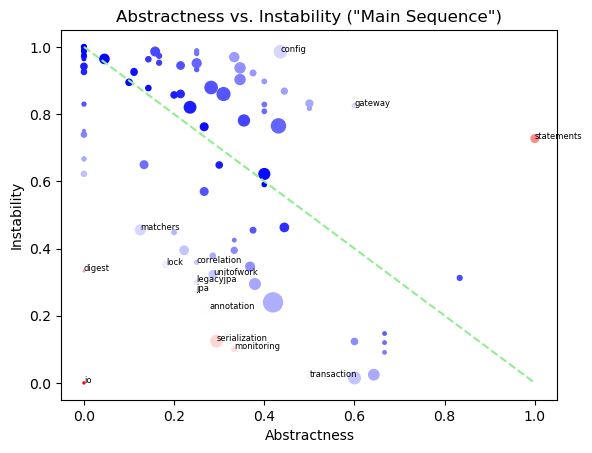

In [14]:
# data points scaled by the number of types and colored by the distance to the "main sequence"
plot.scatter(
    instabilityPerAbstractness.abstractness, # x axis shows abstractness
    instabilityPerAbstractness.instability, # y axis shows instability
    s=instabilityPerAbstractness.typesInPackage * 2, # scale depends on number of contained types
    c=instabilityPerAbstractness.distance, # color depends on distance to the main sequence
    cmap='bwr' # colormap that prints high values in red and lower values in blue
)
# green "main sequence" line
plot.plot([0,1], [1,0], c='lightgreen', linestyle='dashed') 

# add the packagenames to the those with the 15 highest distance values
distanceAnnotationThreshold = instabilityPerAbstractness.distance.nlargest(15).iloc[-1]
# (variant) highest 15% (quantile) of all distance values
# distanceAnnotationThreshold = instabilityPerAbstractness.distance.quantile(0.85)
for i, name in enumerate(instabilityPerAbstractness.packageName):
    if (instabilityPerAbstractness.distance[i] >= distanceAnnotationThreshold):
        x_position = instabilityPerAbstractness.abstractness[i]
        y_position = instabilityPerAbstractness.instability[i]
        # To overcome overlapping text annotations for multiple data points on the same position, 
        # entries with same position values in the past indizes are count and used to offset the y-position
        # so that multiple names are written underneath each other.
        alreadyExistingPositions = countPastEntriesWithSameValues(instabilityPerAbstractness, i, 'abstractness', 'instability')
        y_position = y_position - alreadyExistingPositions / len(instabilityPerAbstractness) * 2
        
        plot.annotate(name, (x_position, y_position), size=6)
            
plot.title('Abstractness vs. Instability ("Main Sequence")')
plot.xlabel('Abstractness')
plot.ylabel('Instability')
plot.show()